# **Aprendizado não supervisionado**

*Luiz Faccio*

In [10]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import pairwise_distances
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist

In [11]:
df = pd.read_csv("MusicasJogosDataset_20232_20251.csv")
df.shape

(92, 45)

## **Treinando Modelos**

Não há necessidade de tratar os dados

Os modelos escolhidos foram k-means e AgglomerativeClustering com diferentes parâmetros

In [12]:
# Calculando a distanceia entre os "pontos"
points = df.iloc[1:].drop(columns=["Nome"]).values

distances = pdist(points, metric="euclidean")

avg_distance = distances.mean()
std_distance = distances.std()

print(f"Média das distâncias: {avg_distance:.4f}")
print(f"Desvio padrão das distâncias: {std_distance:.4f}")

Média das distâncias: 4.3975
Desvio padrão das distâncias: 0.5114


In [13]:
#Parâmetros

k_means_params = {
    "n_clusters" : 8,
}

agglomerative_params = {
    "n_clusters": None,
    "metric" : "euclidean",
    "compute_full_tree" : True,
}

In [14]:
model_k = KMeans(**k_means_params)
model_k.fit(df.drop(columns=["Nome"]))

agglomerative_model = AgglomerativeClustering(**agglomerative_params, distance_threshold = 4)
agglomerative_model.fit(df.drop(columns=["Nome"]))

agglomerative_model_2 = AgglomerativeClustering(**agglomerative_params, distance_threshold = 4.6)
agglomerative_model_2.fit(df.drop(columns=["Nome"]))

agglomerative_model_3 = AgglomerativeClustering(**agglomerative_params, distance_threshold = 5.7)
agglomerative_model_3.fit(df.drop(columns=["Nome"]))

agglomerative_model_4 = AgglomerativeClustering(**agglomerative_params, distance_threshold = 5.8)
agglomerative_model_4.fit(df.drop(columns=["Nome"]))

AgglomerativeClustering(compute_full_tree=True, distance_threshold=5.8,
                        n_clusters=None)

## **Visualizando resultados**

In [15]:
#

lines = "==========================================="



=========================================== RESULTADOS ===========================================


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91
Nome,Felipe Grando,Tainam Garbin,Patrícia Trevisan,Natalia Ferrandin,Paulo Sergio Nunes,Ismael Bortoluzzi,Letícia da Rosa,Ashley Saint-Louis,Jeffley Garçon,Gabriel Menoncin,Matheus Biasi,Karen Ruver Mentges,Gustavo Zampieron,Jean Fenner,Pedro Dutra,Anna Ferronato,Lucas Ferrari,Évellyn Camatti,Alexsandro Schneider,Édipo Antonio,Guilherme Fusieger,Alex Sandro Zarpelon,Diogo Maciel da Cunha,Luiz Paulo,Andrei Danelli,Isabeli Reik,Milena Ceolin,Heitor Machado,Nícolas Hackenhar,Carlos Thomas,Gustavo Alberton,Giovane Gonçalves,Artur Gabriel Berno,Angemydelson Saint-Bert,Matheus Slama,Linka Sofia,Larissa Mones Bedin,João Lamaison,Bianca Gabriela Fritsch,Diogo Kemmerich,Matheus Vieira Santos,Gabriel Kolling da Silva,Geovano Lago Quatrin,Luiz Fernando Klein,Thaila Schmidt,Robert Drey,Gabriel Schmitz Vieira,Aline Morais,Daniele Karoline,João Bettu,Bruno Neckel,João Marcos Soares,Eduardo Folle Miotto,Nicole Moritz schneider,João Henrique Alves,Marco Antonio Balestrin,Lucas Smaniotto,João Gomes,Jacquet Leme,Victor de Conto,Ana Clara Brusamarello,Richard Facin Souza,Valtemir Gomes,Gabrieli Loeblein Brutscher,Yuri Lanzini,MATHEUS HENRIQUE RODRIGUES DA COSTA,Loude Djema Sime,Diego S. Minichiello,Kellane,Axel Aviloff,Pamela Gheno,Leonardo Nakamichi,Felipe da Silva,Mateus Azor Frutuoso,Henrique Alberto de Andrade,Hallyson Cruz,Cecília Penha,Alexsandro Lazzaretti,Gian Ricardo Weber,Gustavo da F. Roza,Djonatan R. C. Bonelli,Igor Lautert Bazei,Ana Clara Santos,Winicius,Everson Coser,Komi Parfait Moussougan,Andrei Camilotto,Kevin Cadena,Luiz Faccio,Lucas,João Ferrari,Thiago Almeida
KMeans,6,5,5,6,0,4,4,5,5,7,5,0,6,0,4,0,2,2,7,2,5,5,1,4,2,5,6,1,7,3,5,0,5,2,1,2,6,1,6,1,5,3,0,6,6,1,1,4,1,3,1,3,1,5,4,1,1,4,7,3,4,1,4,1,3,0,5,3,6,6,0,7,0,1,0,0,6,3,3,5,0,2,6,4,5,7,0,0,6,6,2,3
Agglomerative (dt: 4),6,23,20,36,17,16,22,2,2,4,35,32,19,32,15,11,12,20,33,10,23,13,1,16,12,2,28,14,4,4,35,0,13,8,1,5,7,27,9,14,36,10,6,19,29,1,1,7,31,3,14,3,14,15,21,31,31,15,8,27,34,26,7,22,3,30,30,24,29,0,33,25,0,1,21,17,18,4,3,11,0,5,5,16,12,25,18,17,19,9,5,24
Agglomerative (dt: 4.6),12,0,20,12,17,9,5,13,13,10,6,4,19,4,15,16,6,20,4,22,0,6,2,9,6,13,3,14,10,10,6,0,6,18,2,11,3,5,7,14,12,22,12,19,7,2,2,3,2,8,14,8,14,15,21,2,2,15,18,5,5,1,3,5,8,16,16,2,7,0,4,1,0,2,21,17,9,10,8,16,0,11,11,9,6,1,9,17,19,7,11,2
Agglomerative (dt: 5.7),1,6,1,1,3,9,2,1,1,0,0,3,10,3,10,6,0,1,3,0,6,0,4,9,0,1,7,4,0,0,0,6,0,5,4,0,7,2,2,4,1,0,1,10,2,4,4,7,4,8,4,8,4,10,3,4,4,10,5,2,2,5,7,2,8,6,6,4,2,6,3,5,6,4,3,3,9,0,8,6,6,0,0,9,0,5,9,3,10,2,0,4
Agglomerative (dt: 5.8),3,6,3,3,0,0,1,3,3,2,2,0,1,0,1,6,2,3,0,2,6,2,4,0,2,3,7,4,2,2,2,6,2,5,4,2,7,1,1,4,3,2,3,1,1,4,4,7,4,8,4,8,4,1,0,4,4,1,5,1,1,5,7,1,8,6,6,4,1,6,0,5,6,4,0,0,0,2,8,6,6,2,2,0,2,5,0,0,1,1,2,4


=========================================== CLUSTERS ===========================================


,Número de clusters,Média de pessoas por cluster
KMeans,8.0,11.500000
Agglomerative (dt: 4),37.0,2.486486
Agglomerative (dt: 4.6),23.0,4.000000
Agglomerative (dt: 5.7),11.0,8.363636
Agglomerative (dt: 5.8),9.0,10.222222


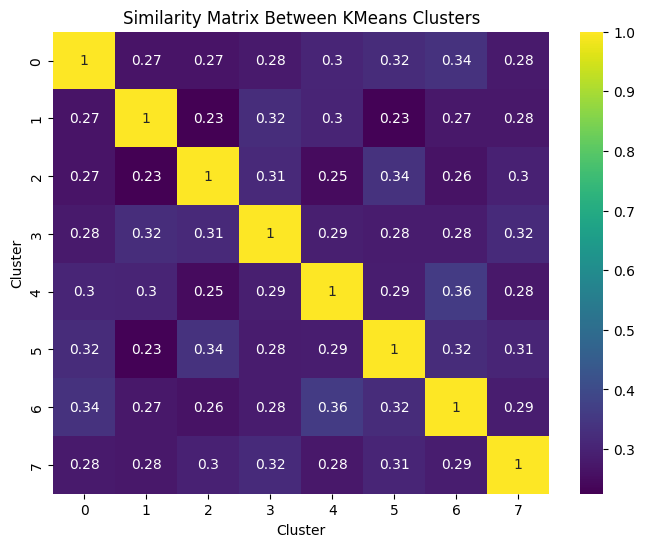

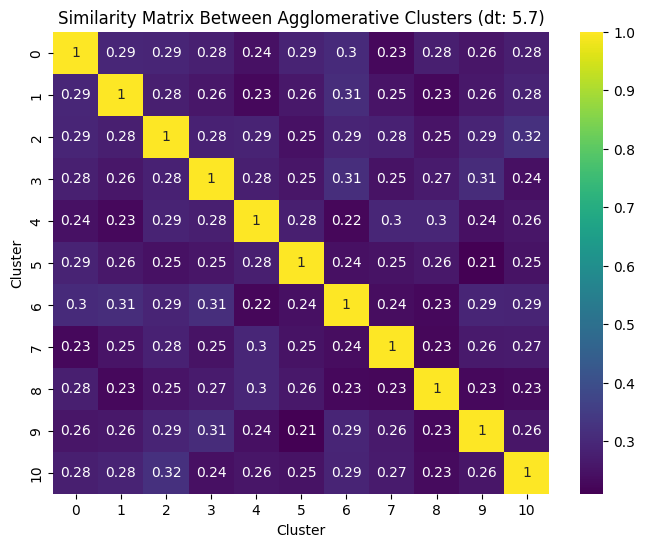

In [16]:
results = pd.DataFrame({
    "Nome": df["Nome"],
    "KMeans": model_k.labels_,
    "Agglomerative (dt: 4)": agglomerative_model.labels_,
    "Agglomerative (dt: 4.6)": agglomerative_model_2.labels_,
    "Agglomerative (dt: 5.7)": agglomerative_model_3.labels_,
    "Agglomerative (dt: 5.8)": agglomerative_model_4.labels_,
})

# Calculate the average number of points per cluster for each model
means = [
    results["KMeans"].value_counts().mean(),
    results["Agglomerative (dt: 4)"].value_counts().mean(),
    results["Agglomerative (dt: 4.6)"].value_counts().mean(),
    results["Agglomerative (dt: 5.7)"].value_counts().mean(),
    results["Agglomerative (dt: 5.8)"].value_counts().mean(),
]

clusters = pd.DataFrame({
    "KMeans": [model_k.get_params()["n_clusters"], means[0]],
    "Agglomerative (dt: 4)": [agglomerative_model.n_clusters_, means[1]],
    "Agglomerative (dt: 4.6)": [agglomerative_model_2.n_clusters_, means[2]],
    "Agglomerative (dt: 5.7)": [agglomerative_model_3.n_clusters_, means[3]],
    "Agglomerative (dt: 5.8)": [agglomerative_model_4.n_clusters_, means[4]],
}).rename(index={0: "Número de clusters", 1: "Média de pessoas por cluster"})



with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(lines + " RESULTADOS " + lines)
    display(results.transpose())

    print(lines + " CLUSTERS " + lines)
    display(clusters.transpose())

    # Get cluster labels and features (excluding "Nome")
    labels = model_k.labels_
    features = df.drop(columns=["Nome"]).values

    # Compute cluster centers
    centers = model_k.cluster_centers_

    # Compute similarity (inverse of distance) matrix between cluster centers
    similarity_matrix = 1 / (1 + pairwise_distances(centers, metric="euclidean"))

    plt.figure(figsize=(8, 6))
    sns.heatmap(similarity_matrix, annot=True, cmap="viridis", xticklabels=range(model_k.n_clusters), yticklabels=range(model_k.n_clusters))
    plt.title("Similarity Matrix Between KMeans Clusters")
    plt.xlabel("Cluster")
    plt.ylabel("Cluster")
    plt.show()

    # Compute cluster centers for Agglomerative (dt: 5.8)
    agg_labels = agglomerative_model_3.labels_
    agg_features = df.drop(columns=["Nome"]).values

    agg_centers = np.array([agg_features[agg_labels == i].mean(axis=0) for i in range(agglomerative_model_3.n_clusters_)])

    agg_similarity_matrix = 1 / (1 + pairwise_distances(agg_centers, metric="euclidean"))

    plt.figure(figsize=(8, 6))
    sns.heatmap(agg_similarity_matrix, annot=True, cmap="viridis", xticklabels=range(agglomerative_model_3.n_clusters_), yticklabels=range(agglomerative_model_3.n_clusters_))
    plt.title("Similarity Matrix Between Agglomerative Clusters (dt: 5.7)")
    plt.xlabel("Cluster")
    plt.ylabel("Cluster")
    plt.show()



In [43]:
#
centroides = pd.DataFrame(model_k.cluster_centers_.round(3), columns=df.columns[1:])
count = pd.Series(model_k.labels_).value_counts().sort_index()
print(lines + " AFINIDADES (CENTROIDES DO K_MEANS) " + lines)

for i in range(centroides.shape[0]):
    cols = centroides.columns[centroides.iloc[i] > 0.85].tolist()
    print(f"Cluster {i}: ", end="")
    flag = 0
    if (len(cols) >=9):
        for i in range(len(cols)):
            if  i//9 >= 1 and flag == 0:
                flag = 1
                print("")
            print(f"{cols[i]},", end=" ")
    else:
        for col in cols:
            print(f"{col},", end=" ")
    
    print("\n")

media_bandinha_cartas = centroides[["Bandinha", "Cartas"]].mean(axis=1).rename("Média Bandinha+Cartas/Pessoa")
pd.concat([centroides[["Bandinha", "Cartas"]], media_bandinha_cartas, count], axis=1).rename(columns={"count": "Número de pessoas no cluster"})

=========================================== AFINIDADES (CENTROIDES DO K_MEANS) ===========================================
Cluster 0: Pop, Rock, Eletrônica, Estratégia, Survival, RPG, Puzzle, 

Cluster 1: Pop, Rock, Hip-Hop, MPB, Indie, Bossa Nova, Samba, Pagode, Reggae, 
FPS, Mundo Aberto, Estratégia, Survival, Arcade, RPG, Plataforma, Cartas, Tabuleiro, Luta, Puzzle, 

Cluster 2: Sertanejo, Funk, Bandinha, Eletrônica, Pagode, Reggaeton, Esporte, 

Cluster 3: Pop, Sertanejo, Funk, Rock, Bandinha, Hip-Hop, Pagode, Mundo Aberto, Estratégia, 
Survival, 

Cluster 4: Rock, MPB, Clássica, FPS, Mundo Aberto, Estratégia, Survival, Cartas, Tabuleiro, 

Cluster 5: 

Cluster 6: Pop, Rock, Indie, Mundo Aberto, 

Cluster 7: Pop, Eletrônica, Hip-Hop, House, 



,Bandinha,Cartas,Média Bandinha+Cartas/Pessoa,Número de pessoas no cluster
0,0.429,0.286,0.3575,14
1,0.267,1.000,0.6335,15
2,0.875,0.750,0.8125,8
3,0.900,0.800,0.8500,10
4,0.700,0.900,0.8000,10
5,0.400,0.733,0.5665,15
6,0.143,0.571,0.3570,14
7,0.167,0.333,0.2500,6


In [ ]:
#
print(lines + " AFINIDADES (AGLOMMERATIVE dt: 5.7) " + lines)

agg_results = pd.concat([df, pd.DataFrame(agglomerative_model_3.labels_)], axis=1).rename({0: "Cluster"}, axis=1)
agg_results.drop(columns=["Nome"], inplace=True)
count = agg_results["Cluster"].value_counts()
agg_results = agg_results.groupby("Cluster").mean().round(3)

for i in range(agg_results.shape[0]):
    cols = agg_results.columns[agg_results.iloc[i] > 0.85].tolist()
    print(f"Cluster {i}: ", end="")
    flag = 0
    if (len(cols) >=9):
        for i in range(len(cols)):
            if  i//9 >= 1 and flag == 0:
                flag = 1
                print("")
            print(f"{cols[i]},", end=" ")
    else:
        for col in cols:
            print(f"{col},", end=" ")
    
    print("\n")

media_bandinha_cartas = agg_results[["Bandinha", "Cartas"]].mean(axis=1).rename("Média Bandinha+Cartas/Pessoa")
pd.concat([agg_results[["Bandinha", "Cartas"]], media_bandinha_cartas, count], axis=1) 

=========================================== AFINIDADES (AGLOMMERATIVE dt: 5.7) ===========================================
Cluster 0: Sertanejo, Mundo Aberto, 

Cluster 1: Pop, Tabuleiro, Puzzle, 

Cluster 2: Pop, Funk, Rock, MPB, Indie, Mundo Aberto, Estratégia, Survival, Simulação, 
Cartas, 

Cluster 3: Pop, Rock, Eletrônica, FPS, Mundo Aberto, Estratégia, Survival, Arcade, RPG, 
Plataforma, Puzzle, 

Cluster 4: Pop, Rock, Eletrônica, Hip-Hop, MPB, Lo-Fi, Indie, Bossa Nova, Samba, 
Pagode, Reggae, Clássica, FPS, Mundo Aberto, Estratégia, Survival, Arcade, RPG, Plataforma, Cartas, Tabuleiro, Luta, MMORPG, 

Cluster 5: Pop, Sertanejo, Eletrônica, Hip-Hop, Reggae, Corrida, Luta, 

Cluster 6: 

Cluster 7: Pop, Rock, K-Pop, House, MPB, Bossa Nova, Metal, Reggaeton, Clássica, 
Mundo Aberto, Simulação, Arcade, RPG, 

Cluster 8: Pop, Sertanejo, Funk, Rock, Bandinha, Hip-Hop, Pagode, Gauchesca, Reggae, 
Metal, Clássica, FPS, Mundo Aberto, Estratégia, Corrida, Survival, Simulação, RPG, Cartas,

,Bandinha,Cartas,Média Bandinha/Cartas,count
Cluster,,,,
0,0.647,0.765,0.7060,17
1,0.333,0.778,0.5555,9
2,0.444,1.000,0.7220,9
3,0.778,0.222,0.5000,9
4,0.357,0.929,0.6430,14
5,0.000,0.400,0.2000,5
6,0.400,0.200,0.3000,10
7,0.000,0.750,0.3750,4
8,1.000,1.000,1.0000,4


In [44]:
#
print(lines + " AFINIDADES (AGLOMMERATIVE dt: 5.8) " + lines)
agg_results = pd.concat([df, pd.DataFrame(agglomerative_model_4.labels_)], axis=1).rename({0: "Cluster"}, axis=1)
agg_results.drop(columns=["Nome"], inplace=True)
count = agg_results["Cluster"].value_counts()
agg_results = agg_results.groupby("Cluster").mean().round(3)

for i in range(agg_results.shape[0]):
    cols = agg_results.columns[agg_results.iloc[i] > 0.85].tolist()
    print(f"Cluster {i}: ", end="")
    flag = 0
    if (len(cols) >=9):
        for i in range(len(cols)):
            if  i//9 >= 1 and flag == 0:
                flag = 1
                print("")
            print(f"{cols[i]},", end=" ")
    else:
        for col in cols:
            print(f"{col},", end=" ")
    
    print("\n")

media_bandinha_cartas = agg_results[["Bandinha", "Cartas"]].mean(axis=1).rename("Média Bandinha+Cartas/Pessoas")
pd.concat([agg_results[["Bandinha", "Cartas"]], media_bandinha_cartas, count], axis=1).rename(columns={"count": "Número de pessoas no cluster"})

=========================================== AFINIDADES (AGLOMMERATIVE dt: 5.8) ===========================================
Cluster 0: Rock, Eletrônica, FPS, Mundo Aberto, Estratégia, Survival, Simulação, RPG, 

Cluster 1: Pop, Funk, Rock, Indie, Pagode, Mundo Aberto, Estratégia, Survival, 

Cluster 2: Sertanejo, Mundo Aberto, 

Cluster 3: Pop, Tabuleiro, Puzzle, 

Cluster 4: Pop, Rock, Eletrônica, Hip-Hop, MPB, Lo-Fi, Indie, Bossa Nova, Samba, 
Pagode, Reggae, Clássica, FPS, Mundo Aberto, Estratégia, Survival, Arcade, RPG, Plataforma, Cartas, Tabuleiro, Luta, MMORPG, 

Cluster 5: Pop, Sertanejo, Eletrônica, Hip-Hop, Reggae, Corrida, Luta, 

Cluster 6: 

Cluster 7: Pop, Rock, K-Pop, House, MPB, Bossa Nova, Metal, Reggaeton, Clássica, 
Mundo Aberto, Simulação, Arcade, RPG, 

Cluster 8: Pop, Sertanejo, Funk, Rock, Bandinha, Hip-Hop, Pagode, Gauchesca, Reggae, 
Metal, Clássica, FPS, Mundo Aberto, Estratégia, Corrida, Survival, Simulação, RPG, Cartas, Luta, Realidade Virtual, 



,Bandinha,Cartas,Média Bandinha+Cartas/Pessoas,Número de pessoas no cluster
Cluster,,,,
0,0.714,0.500,0.6070,14
1,0.333,0.800,0.5665,15
2,0.647,0.765,0.7060,17
3,0.333,0.778,0.5555,9
4,0.357,0.929,0.6430,14
5,0.000,0.400,0.2000,5
6,0.400,0.200,0.3000,10
7,0.000,0.750,0.3750,4
8,1.000,1.000,1.0000,4
